In [32]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [34]:
train = pd.read_csv("/kaggle/input/iris/Iris.csv")
train.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [35]:
train["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [36]:
train.value_counts()

Id   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species        
1    5.1            3.5           1.4            0.2           Iris-setosa        1
95   5.6            2.7           4.2            1.3           Iris-versicolor    1
97   5.7            2.9           4.2            1.3           Iris-versicolor    1
98   6.2            2.9           4.3            1.3           Iris-versicolor    1
99   5.1            2.5           3.0            1.1           Iris-versicolor    1
                                                                                 ..
51   7.0            3.2           4.7            1.4           Iris-versicolor    1
52   6.4            3.2           4.5            1.5           Iris-versicolor    1
53   6.9            3.1           4.9            1.5           Iris-versicolor    1
54   5.5            2.3           4.0            1.3           Iris-versicolor    1
150  5.9            3.0           5.1            1.8           Iris-virginica    

In [37]:
print(train.columns.values)

['Id' 'SepalLengthCm' 'SepalWidthCm' 'PetalLengthCm' 'PetalWidthCm'
 'Species']


In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [39]:
train.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [40]:
train.describe(include=['O'])

,Species
count,150
unique,3
top,Iris-setosa
freq,50


In [41]:
pd.crosstab(train.SepalLengthCm, train.Species)

Species,Iris-setosa,Iris-versicolor,Iris-virginica
SepalLengthCm,,,
4.3,1,0,0
4.4,3,0,0
4.5,1,0,0
4.6,4,0,0
4.7,2,0,0
4.8,5,0,0
4.9,4,1,1
5.0,8,2,0
5.1,8,1,0


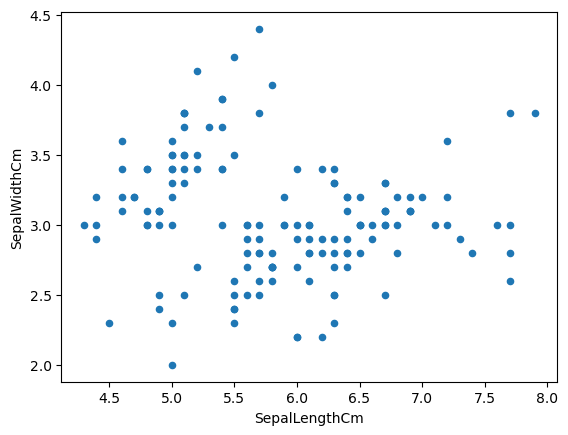

In [42]:
train.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm");

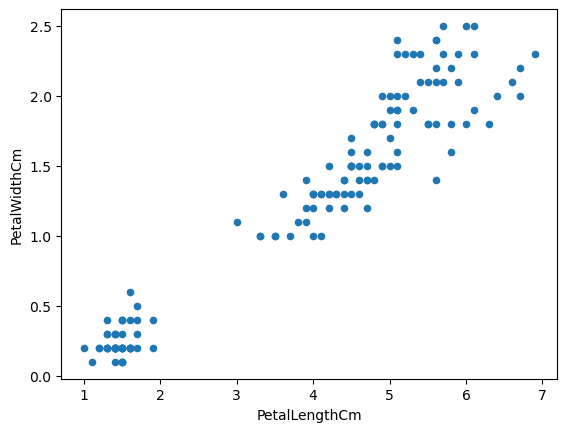

In [43]:
train.plot(kind="scatter", x="PetalLengthCm", y="PetalWidthCm");

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

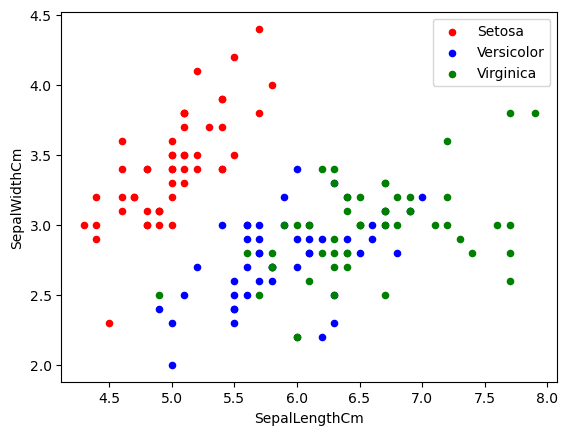

In [69]:
fig = train[train.Species=="Iris-setosa"].plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm", color="red", label="Setosa")
train[train.Species=="Iris-versicolor"].plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm", color="blue", label="Versicolor", ax=fig)
train[train.Species=="Iris-virginica"].plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm", color="green", label="Virginica", ax=fig)



In [45]:
train.drop("Id", axis=1, inplace=True)

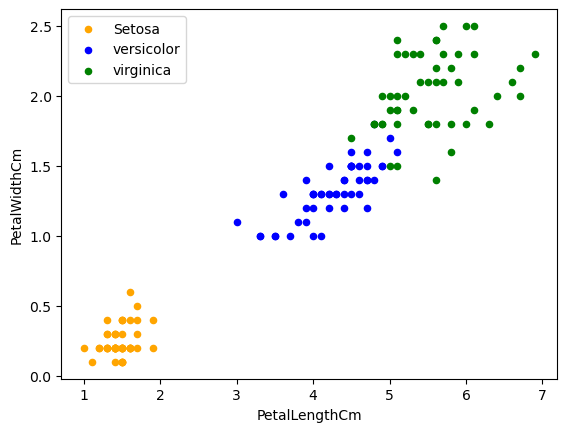

In [70]:
fig = train[train.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='orange', label='Setosa')
train[train.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='blue', label='versicolor',ax=fig)
train[train.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='green', label='virginica', ax=fig)
fig=plt.gcf()

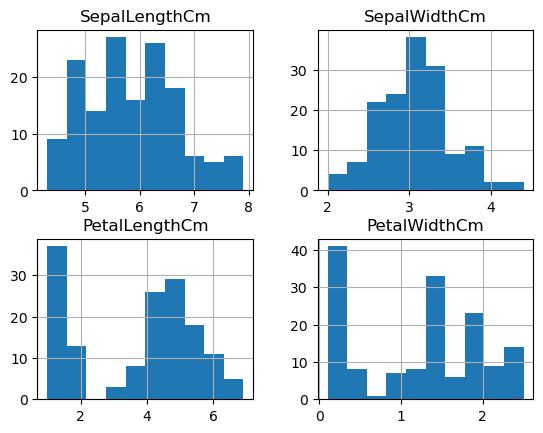

In [72]:
train.hist()
plt.show()

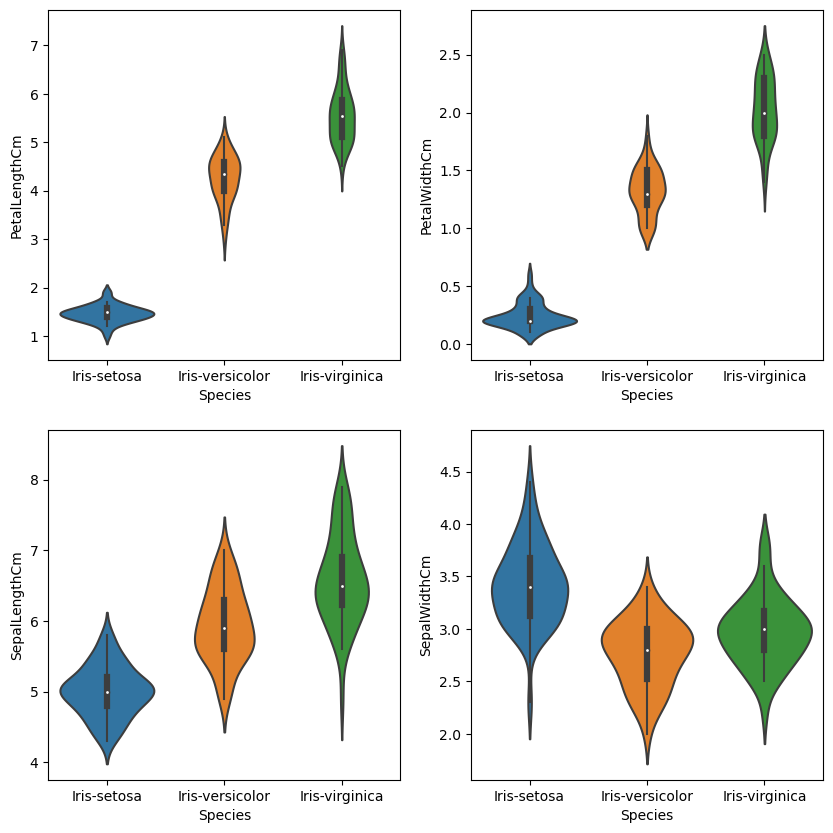

In [80]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=train);
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=train);
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=train);
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=train);

In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

In [83]:
train.shape

(150, 5)

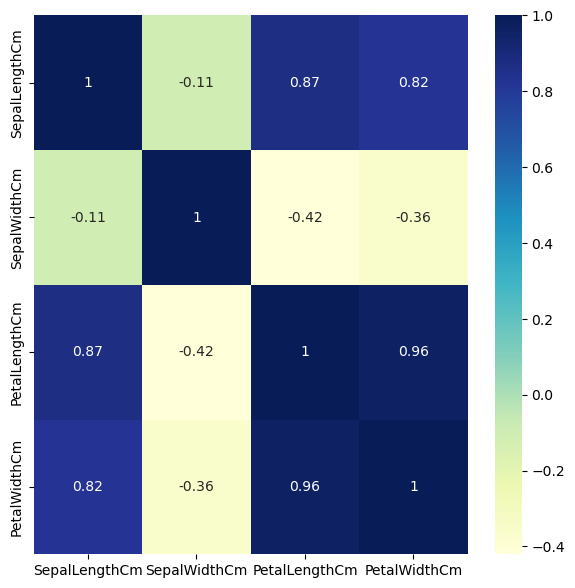

In [87]:
plt.figure(figsize=(7, 7))
sns.heatmap(train.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [99]:
x = train.drop("Species", axis=1)
y = train["Species"]

In [100]:
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [101]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [106]:
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [111]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((105, 4), (45, 4), (105,), (45,))

In [148]:
models = {"KNN": KNeighborsClassifier(),
         "SVM": svm.SVC(),
         "RFC": RandomForestClassifier(),
         "Log regg": LogisticRegression(),
         "Decision tree": DecisionTreeClassifier()}

def fit_and_score(models, x_train, x_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(x_train, y_train)
        model_scores[name] = model.score(x_test, y_test)
    return model_scores
    

In [149]:
model_scores = fit_and_score(models=models,
                             x_train=x_train,
                             x_test=x_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

{'KNN': 1.0, 'SVM': 1.0, 'RFC': 1.0, 'Log regg': 1.0, 'Decision tree': 1.0}